In [41]:
import pandas as pd
import numpy as np

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [44]:
import lightgbm
from lightgbm import LGBMClassifier

In [107]:
def Submission(pred, Pass_id, name):
    df = pd.concat([Pass_id, pred], axis= 1)
    filename = name + '.csv'
    df.to_csv(filename,index=False)

In [79]:
def heatmap(df, target):
    df_hm = df.copy()
    tabhm = df_hm.corr()
    plt.figure(figsize=(11, 11))
    sns.heatmap(tabhm)

In [46]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [47]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
data_test.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [50]:
train = data_train.copy()
train.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [51]:
from sklearn. preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

columns_enc = 'Sex'
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(train[[columns_enc]]).toarray())
encoder_df.columns = encoder.get_feature_names_out()

#merge one-hot encoded columns back with original DataFrame
final_train = train.join(encoder_df)

final_train.drop('Sex', axis=1, inplace=True)
final_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,NaN,S,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,C85,C,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,NaN,S,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,C123,S,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,NaN,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN,S,0.0,1.0
887,888,1,1,19.0,0,0,30.0000,B42,S,1.0,0.0
888,889,0,3,NaN,1,2,23.4500,NaN,S,1.0,0.0
889,890,1,1,26.0,0,0,30.0000,C148,C,0.0,1.0


In [52]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

columns_enc = 'Sex'
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data_test[[columns_enc]]).toarray())
encoder_df.columns = encoder.get_feature_names_out()

#merge one-hot encoded columns back with original DataFrame
final_test = data_test.join(encoder_df)

final_test.drop('Sex', axis=1, inplace=True)
final_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,NaN,Q,0.0,1.0
1,893,3,47.0,1,0,7.0000,NaN,S,1.0,0.0
2,894,2,62.0,0,0,9.6875,NaN,Q,0.0,1.0
3,895,3,27.0,0,0,8.6625,NaN,S,0.0,1.0
4,896,3,22.0,1,1,12.2875,NaN,S,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,NaN,S,0.0,1.0
414,1306,1,39.0,0,0,108.9000,C105,C,1.0,0.0
415,1307,3,38.5,0,0,7.2500,NaN,S,0.0,1.0
416,1308,3,NaN,0,0,8.0500,NaN,S,0.0,1.0


In [53]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Sex_female   891 non-null    float64
 10  Sex_male     891 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 76.7+ KB


<Axes: >

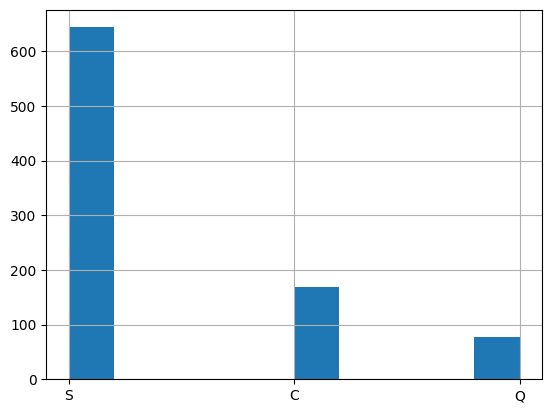

In [54]:
final_train['Embarked'].hist()

S - больше всего сели в Саутгемптоне, заполним пропуски им.

In [55]:
final_train['Embarked'] = final_train['Embarked'].fillna('S')

In [56]:
final_test['Embarked'] = final_test['Embarked'].fillna('S')

<Axes: >

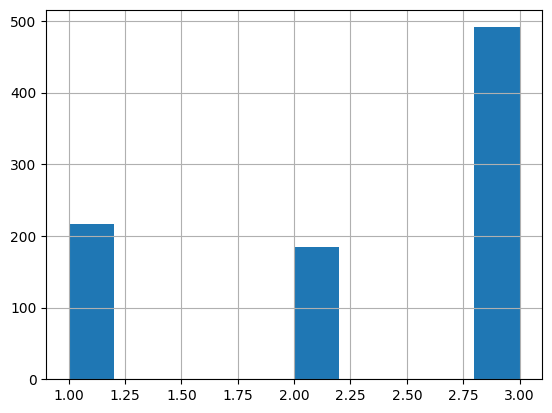

In [57]:
final_train['Pclass'].hist()

In [58]:
final_train.query('Pclass == 3').info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  491 non-null    int64  
 1   Survived     491 non-null    int64  
 2   Pclass       491 non-null    int64  
 3   Age          355 non-null    float64
 4   SibSp        491 non-null    int64  
 5   Parch        491 non-null    int64  
 6   Fare         491 non-null    float64
 7   Cabin        12 non-null     object 
 8   Embarked     491 non-null    object 
 9   Sex_female   491 non-null    float64
 10  Sex_male     491 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 46.0+ KB


На основе данных о занимаемом классе на корабле, изменяем пропуски на медиальные значения

In [59]:
def AgeNull(df):
    _df = df.copy()
    classes = _df['Pclass'].unique()
    for _class in classes:
        _df.loc[(_df['Pclass'] == _class) & (_df['Age'].isnull()), 'Age'] = _df.loc[_df['Pclass'] == _class]['Age'].median()
    return _df

In [60]:
final_train = AgeNull(final_train)

In [61]:
final_test = AgeNull(final_test)

"Создаем семьи" - Если есть данные в столбцах сестры/братья,супруги и дети - говорим, что объект принадлежит к семье

In [62]:
final_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [63]:
final_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [64]:
final_train['Family'] = 0
final_test['Family'] = 0

In [65]:
final_train.loc[((final_train['SibSp'] != 0) & (final_train['Parch'] != 0), ['Family'])] = 1

In [66]:
final_test.loc[((final_test['SibSp'] != 0) & (final_test['Parch'] != 0), ['Family'])] = 1

Не вижу смысла в столбце 'Cabin', слишком много пропущенных значений + категориальные признаки

In [67]:
final_train.drop('Cabin', axis = 1, inplace=True)
final_test.drop('Cabin', axis = 1, inplace=True)

<Axes: >

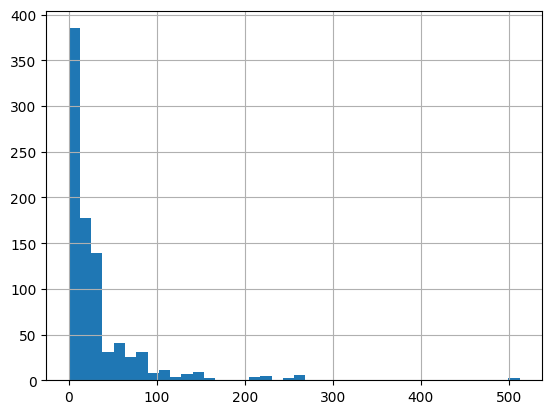

In [68]:
final_train['Fare'].hist(bins=40)

Сделаем доп признаки из стоимости билетов - разделим на 3 класса, как в столбце PClass

In [69]:
final_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Разделим по первым трем квартилям

In [70]:
final_train['FirstClassFare'] = 0
final_train['SecondClassFare'] = 0
final_train['ThirdClassFare'] = 0

final_test['FirstClassFare'] = 0
final_test['SecondClassFare'] = 0
final_test['ThirdClassFare'] = 0

In [71]:
final_train.loc[(final_train['Fare'] > final_train['Fare'].quantile(0.5), ['FirstClassFare'])] =  1
final_train.loc[((final_train['Fare'] <= final_train['Fare'].quantile(0.5)) & (final_train['Fare'] > final_train['Fare'].quantile(0.25)), ['SecondClassFare'])] =  1
final_train.loc[(final_train['Fare'] <= final_train['Fare'].quantile(0.25), ['ThirdClassFare'])] =  1

In [72]:
final_test.loc[(final_test['Fare'] > final_test['Fare'].quantile(0.5), ['FirstClassFare'])] =  1
final_test.loc[((final_test['Fare'] <= final_test['Fare'].quantile(0.5)) & (final_test['Fare'] > final_test['Fare'].quantile(0.25)), ['SecondClassFare'])] =  1
final_test.loc[(final_test['Fare'] <= final_test['Fare'].quantile(0.25), ['ThirdClassFare'])] =  1

In [73]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

columns_enc = 'Embarked'
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_train[[columns_enc]]).toarray())
encoder_df.columns = encoder.get_feature_names_out()

#merge one-hot encoded columns back with original DataFrame
final_train = final_train.join(encoder_df)

final_train.drop('Embarked', axis=1, inplace=True)

In [74]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

columns_enc = 'Embarked'
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_test[[columns_enc]]).toarray())
encoder_df.columns = encoder.get_feature_names_out()

#merge one-hot encoded columns back with original DataFrame
final_test = final_test.join(encoder_df)

final_test.drop('Embarked', axis=1, inplace=True)

In [75]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Sex_female       891 non-null    float64
 8   Sex_male         891 non-null    float64
 9   Family           891 non-null    int64  
 10  FirstClassFare   891 non-null    int64  
 11  SecondClassFare  891 non-null    int64  
 12  ThirdClassFare   891 non-null    int64  
 13  Embarked_C       891 non-null    float64
 14  Embarked_Q       891 non-null    float64
 15  Embarked_S       891 non-null    float64
dtypes: float64(7), int64(9)
memory usage: 111.5 KB


In [76]:
y = final_train['Survived']
X = final_train
X.drop('Survived', axis=1, inplace=True)

Есть одно пропущенное значение в данных для прогноза

In [91]:
final_test.loc[(final_test['Fare'].isnull())]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Family,FirstClassFare,SecondClassFare,ThirdClassFare,Embarked_C,Embarked_Q,Embarked_S
152,1044,3,60.5,0,0,NaN,0.0,1.0,0,0,0,0,0.0,0.0,1.0


In [92]:
final_test.loc[(final_test['Fare'].isnull(), 'Fare')] = final_test.loc[(final_test['Pclass'] == 3, 'Fare')].mean()

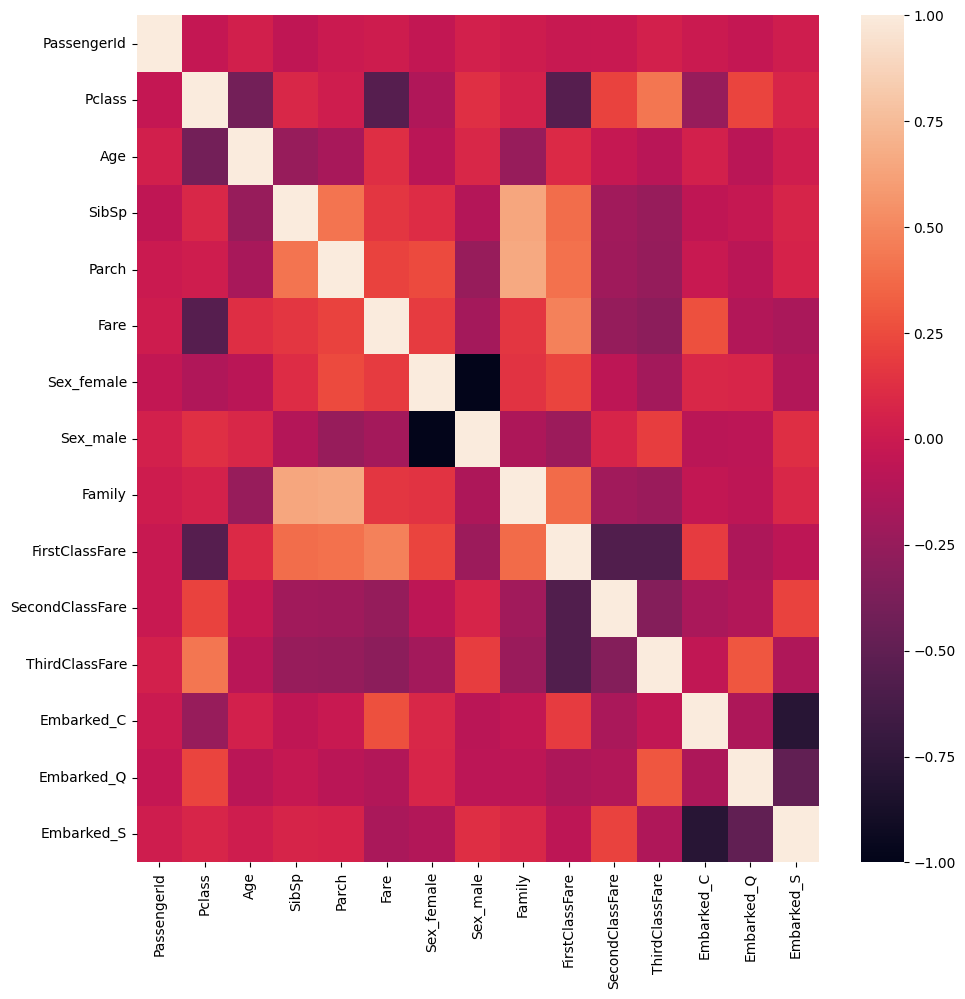

In [81]:
heatmap(final_train, 'Survived')

In [93]:
model = RandomForestClassifier()
model.fit(X, y)
predict = model.predict(final_test)

In [105]:
pr = pd.Series(predict, name='Survived')

In [108]:
Submission(pr, final_test[final_test.columns[0]], 'SubmissionTry')

In [109]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [110]:
cv = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
cv.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100]},
             verbose=1)

In [111]:
best_clf = cv.best_estimator_
print("Best estimator: ", best_clf)

Best estimator:  RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=20)


In [113]:
predictionRF = best_clf.predict(final_test)

In [114]:
prRF = pd.Series(predictionRF, name='Survived')

In [115]:
Submission(prRF, final_test[final_test.columns[0]], 'SubmissionRF')

In [124]:
modelLGBM = LGBMClassifier()
param_grid = {
    'boosting_type' : ['gbdt', 'dart'],
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'num_leaves': [5, 10, 20, 30, 40]
}

In [125]:
cvLGBM = GridSearchCV(modelLGBM, param_grid, cv=4, verbose=1, n_jobs=-1)
cvLGBM.fit(X, y)

Fitting 4 folds for each of 160 candidates, totalling 640 fits


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 489
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


GridSearchCV(cv=4, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'max_depth': [None, 10, 20, 30],
                         'n_estimators': [10, 20, 50, 100],
                         'num_leaves': [5, 10, 20, 30, 40]},
             verbose=1)

In [126]:
best_clfLGBM = cvLGBM.best_estimator_
print("Best estimator: ", best_clfLGBM)

Best estimator:  LGBMClassifier(max_depth=None, n_estimators=20, num_leaves=5)


In [127]:
predictionLGBM = best_clfLGBM.predict(final_test)

In [128]:
prLGBM = pd.Series(predictionLGBM, name='Survived')

In [129]:
Submission(prLGBM, final_test[final_test.columns[0]], 'SubmissionLGBM')

In [132]:
param_grid = {
    'penalty' : [None, 'l1', 'l2', 'elasticnet'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [134]:
from sklearn.model_selection import cross_validate

In [148]:
def PrintCV(pen, solv):
    modelLR = LogisticRegression(solver = solv, penalty=pen, n_jobs=-1, verbose=1, l1_ratio=0.1)
    cr = cross_validate(modelLR, X, y, cv=5, scoring='accuracy')
    acc_res.append([pen, solv, max(cr['test_score'])])
    print('Параметры: регуляризатор ', pen, ', решатель ', solv)
    print('Результат: ', cr['test_score'])

acc_res = []
for solver in param_grid['solver']:
    if ((solver == 'lbfgs') | (solver == 'newton-cg') | (solver == 'newton-cholesky') | (solver == 'sag')):
        penalty = None        
        PrintCV(penalty, solver)
        penalty = 'l2'        
        PrintCV(penalty, solver)
    elif (solver == 'liblinear'):
        penalty = 'l1'        
        PrintCV(penalty, solver)
        penalty = 'l2'        
        PrintCV(penalty, solver)
    else:
        for penalty in param_grid['penalty']:
            PrintCV(penalty, solver)

c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logis

Параметры: регуляризатор  None , решатель  lbfgs
Результат:  [0.74301676 0.79775281 0.78651685 0.78651685 0.80898876]
Параметры: регуляризатор  l2 , решатель  lbfgs
Результат:  [0.75418994 0.81460674 0.76404494 0.78651685 0.80898876]
[LibLinear][LibLinear]

c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py

[LibLinear][LibLinear][LibLinear]Параметры: регуляризатор  l1 , решатель  liblinear
Результат:  [0.78212291 0.81460674 0.78089888 0.78089888 0.80898876]
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Параметры: регуляризатор  l2 , решатель  liblinear
Результат:  [0.76536313 0.81460674 0.78089888 0.79775281 0.81460674]


c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logisti

Параметры: регуляризатор  None , решатель  newton-cg
Результат:  [0.78212291 0.80337079 0.79775281 0.80898876 0.82022472]


c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.

Параметры: регуляризатор  l2 , решатель  newton-cg
Результат:  [0.78212291 0.79775281 0.79775281 0.80337079 0.82022472]
Параметры: регуляризатор  None , решатель  newton-cholesky
Результат:  [0.74860335 0.80337079 0.78089888 0.78651685 0.81460674]


c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logisti

Параметры: регуляризатор  l2 , решатель  newton-cholesky
Результат:  [0.78212291 0.79775281 0.79775281 0.80337079 0.82022472]
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend w

max_iter reached after 0 seconds
Параметры: регуляризатор  None , решатель  sag
Результат:  [0.58659218 0.74157303 0.66853933 0.69662921 0.69101124]
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 

max_iter reached after 0 seconds
Параметры: регуляризатор  l2 , решатель  sag
Результат:  [0.58659218 0.73595506 0.66853933 0.69662921 0.69101124]
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds


c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 

max_iter reached after 0 seconds
Параметры: регуляризатор  l1 , решатель  saga
Результат:  [0.59217877 0.71910112 0.66853933 0.69662921 0.68539326]
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
Параметры: регуляризатор  l2 , решатель  saga
Результат:  [0.59217877 0.7247191  0.66853933 0.69662921 0.68539326]
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds


c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

max_iter reached after 0 seconds
max_iter reached after 0 seconds
Параметры: регуляризатор  elasticnet , решатель  saga
Результат:  [0.59217877 0.7247191  0.6741573  0.69662921 0.68539326]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [155]:
acc_res

[[None, 'lbfgs', 0.8089887640449438],
 ['l2', 'lbfgs', 0.8146067415730337],
 ['l1', 'liblinear', 0.8146067415730337],
 ['l2', 'liblinear', 0.8146067415730337],
 [None, 'newton-cg', 0.8202247191011236],
 ['l2', 'newton-cg', 0.8202247191011236],
 [None, 'newton-cholesky', 0.8146067415730337],
 ['l2', 'newton-cholesky', 0.8202247191011236],
 [None, 'sag', 0.7415730337078652],
 ['l2', 'sag', 0.7359550561797753],
 ['l1', 'saga', 0.7191011235955056],
 ['l2', 'saga', 0.7247191011235955],
 ['elasticnet', 'saga', 0.7247191011235955]]

In [157]:
modelLR = LogisticRegression(solver = acc_res[5][1], penalty=acc_res[5][0], n_jobs=-1, verbose=1, l1_ratio=0.1)
modelLR.fit(X, y)
predictionLR = modelLR.predict(final_test)
prLR = pd.Series(predictionLR, name='Survived')
Submission(prLR, final_test[final_test.columns[0]], 'SubmissionLR')

c:\Users\danil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
